In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [57]:
df = pd.read_csv("./airline-passengers.csv", index_col="Month", parse_dates=True)
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

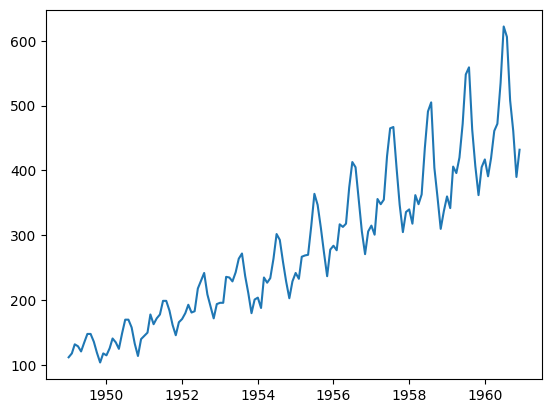

In [58]:
plt.plot(df)

In [59]:
number_of_tests = 12
train = df.iloc[:-number_of_tests]
test = df.iloc[-number_of_tests:]

In [60]:
train.tail()

Passengers
Month                 
1959-08-01         559
1959-09-01         463
1959-10-01         407
1959-11-01         362
1959-12-01         405

In [61]:
test.head()

Passengers
Month                 
1960-01-01         417
1960-02-01         391
1960-03-01         419
1960-04-01         461
1960-05-01         472

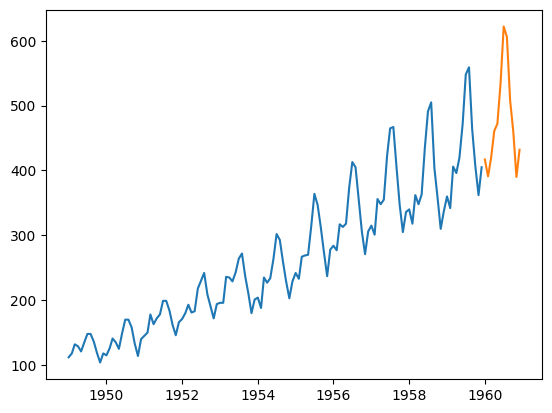

In [62]:
plt.plot(train)
plt.plot(test)

In [63]:
order = (0, 0, 1)  # p, d, q
model = ARIMA(train["Passengers"], order=order)
results = model.fit()
results.summary()

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible star

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -723.750
Date:                Mon, 13 Nov 2023   AIC                           1453.500
Time:                        15:17:00   BIC                           1462.148
Sample:                    01-01-1949   HQIC                          1457.014
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.7590     10.731     24.486      0.000     241.727     283.791
ma.L1          0.9999      2.058      0.486      0.627      -3.035       5.034
sigma2      3265.1659   6693.464      0.488      0.626   -9853.782    1.64e+04
===================================================================================
Ljung-Box (L1) (Q):                  73.83   Jarque-Bera (JB):                 7.07
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.67   Skew:                             0.53
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
prediction_train = results.predict(0, len(train))  # predict on the training data
forecast = results.get_forecast(steps=number_of_tests)  # predict on the test data
prediction_test = forecast.predicted_mean
prediction_lower = forecast.conf_int()["lower Passengers"]
prediction_upper = forecast.conf_int()["upper Passengers"]

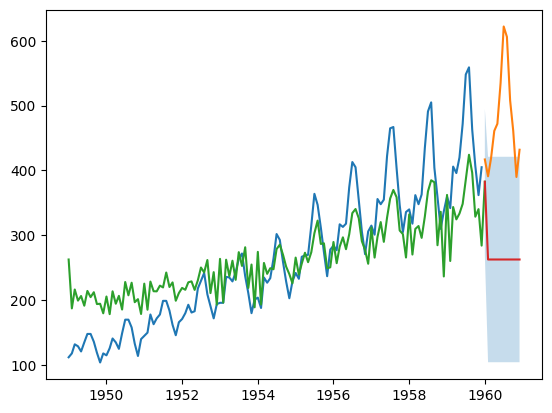

In [65]:
plt.plot(train)
plt.plot(test)
plt.plot(prediction_train)
plt.plot(prediction_test)
plt.fill_between(prediction_lower.index, prediction_lower, prediction_upper, alpha=0.25)

In [66]:
rmse = mean_squared_error(test["Passengers"], prediction_test, squared=False)
rmse

221.80621770068575

In [67]:
def do_modelling_and_plotting(target_column, order):
    model = ARIMA(train[target_column], order=order)
    results = model.fit()
    prediction_train = results.predict(0, len(train))  # predict on the training data
    forecast = results.get_forecast(steps=number_of_tests)  # predict on the test data
    prediction_test = forecast.predicted_mean
    prediction_lower = forecast.conf_int()[f"lower {target_column}"]
    prediction_upper = forecast.conf_int()[f"upper {target_column}"]
    rmse = mean_squared_error(test[target_column], prediction_test, squared=False)
    plt.plot(df[target_column], color="blue")
    plt.plot(prediction_test, color="green")
    plt.title(f"ARIMA - {order} - RMSE: {rmse:.2f}")
    plt.fill_between(prediction_test.index, prediction_lower, prediction_upper, alpha=0.25, color="green")

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary star

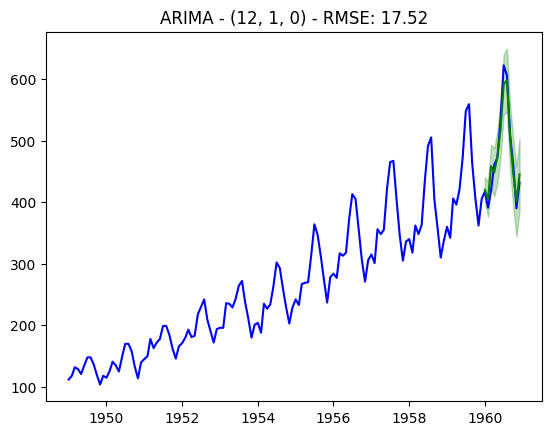

In [68]:
do_modelling_and_plotting("Passengers", (12, 1, 0))

In [69]:
# df["Passengers Diff"] = df["Passengers"].diff()
# df

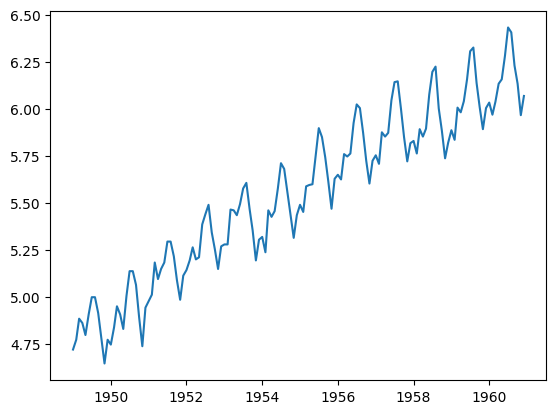

In [70]:
df["Log Passengers"] = np.log(df["Passengers"])
plt.plot(df["Log Passengers"])

/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/melidon/Egyetem/MSc/2. félév/Gépi tanulási esettanulmányok/11_IdoSor/.env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

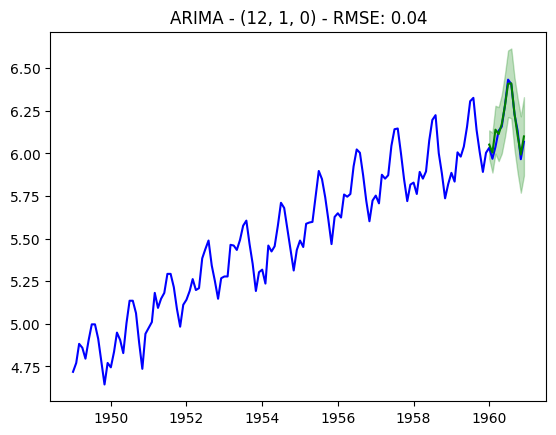

In [71]:
train = df.iloc[:-number_of_tests]
test = df.iloc[-number_of_tests:]
do_modelling_and_plotting("Log Passengers", (12, 1, 0))